### Using more sophisticated images with Convolutional Neural Networks

##### About the dataset

It consists of of 2,000 JPG pictures of cats and dogs. It is a subset of the "Dogs vs. Cats" dataset available on Kaggle, which contains 25,000 images.


In [1]:
#importing libraries

import os
import random
import numpy as np
from io import BytesIO

#Plotting and dealing with images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

#Interactive widgets
from ipywidgets import widgets
from PIL import Image


In [2]:
#setting up directories to load dog and cat images
main_dir = "cats_dogs_data"
train_dir = "cats_dogs_data\\train"
valid_dir = "cats_dogs_data\\test"

# Directory with training cat/dog pictures
train_cat_dir = os.path.join(train_dir, "cats")
train_dog_dir = os.path.join(train_dir, "dogs")

# Directory with validation cat/dog pictures
valid_cat_dir = os.path.join(valid_dir, "cats")
valid_dog_dir = os.path.join(valid_dir, "dogs")

print(f"\nContents of train directory: {os.listdir(train_dir)}")

print(f"\nContents of validation directory: {os.listdir(valid_dir)}")



Contents of train directory: ['cats', 'dogs']

Contents of validation directory: ['cats', 'dogs']


In [3]:
train_cat_files = os.listdir(train_cat_dir)
train_dog_files = os.listdir(train_dog_dir)

valid_cat_files = os.listdir(valid_cat_dir)
valid_dog_files = os.listdir(valid_dog_dir)

print(f"5 files in cats subdir: {train_cat_files[:5]}")
print(f"5 files in dogs subdir: {train_dog_files[:5]}")

5 files in cats subdir: ['cat.0.jpg', 'cat.1.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10002.jpg']
5 files in dogs subdir: ['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.1000.jpg', 'dog.10000.jpg']


In [4]:
# #cleaning data as it contains few images with different channel dimensions
# bad_files = []
# for cat_file in train_cat_files:
#     path = os.path.join(train_cat_dir, cat_file)
#     img = Image.open(path)
#     if img.mode not in ["RGB"]:
#         bad_files.append(path)

# for dog_file in train_dog_files:
#     path = os.path.join(train_dog_dir, dog_file)
#     img = Image.open(path)
#     if img.mode not in ["RGB"]:
#         bad_files.append(path)   

# for cat_file in valid_cat_files:
#     path = os.path.join(valid_cat_dir, cat_file)
#     img = Image.open(path)
#     if img.mode not in ["RGB"]:
#         bad_files.append(path)

# for dog_file in valid_dog_files:
#     path = os.path.join(valid_dog_dir, dog_file)
#     img = Image.open(path)
#     if img.mode not in ["RGB"]:
#         bad_files.append(path)              




In [5]:
# #removing bad files with different dimensions
# if bad_files:
#     for file_path in bad_files: 
#         try: 
#             os.remove(file_path)
#             print(f"Removed: {file_path}")
#         except Exception as e: 
#             print(f"Could not remove {file_path}: {e}")

In [6]:
# #to identify and remove/modify corrupt files
# corrupt_files = []
# for cat_file in train_cat_files:
#     path = os.path.join(train_cat_dir, cat_file)
#     try:
#         img = Image.open(path)
#         img.verify()
#     except Exception as e:
#         corrupt_files.append(path)        

# for dog_file in train_dog_files:
#     path = os.path.join(train_dog_dir, dog_file)
#     try:
#         img = Image.open(path)
#         img.verify()
#     except Exception as e:
#         corrupt_files.append(path)   

# for cat_file in valid_cat_files:
#     path = os.path.join(valid_cat_dir, cat_file)
#     img = Image.open(path)
#     try:
#         img = Image.open(path)
#         img.verify()
#     except Exception as e:
#         corrupt_files.append(path)

# for dog_file in valid_dog_files:
#     path = os.path.join(valid_dog_dir, dog_file)
#     try:
#         img = Image.open(path)
#         img.verify()
#     except Exception as e:
#         corrupt_files.append(path)


# print(f"Total corrupt files: {len(corrupt_files)}")

In [7]:
# if corrupt_files:
#    for f in corrupt_files:
#      try: 
#         img = Image.open(f).convert("RGB") 
#         img.save(f) # overwrite with fixed version
#      except: 
#         os.remove(f) # if repair fails, delete

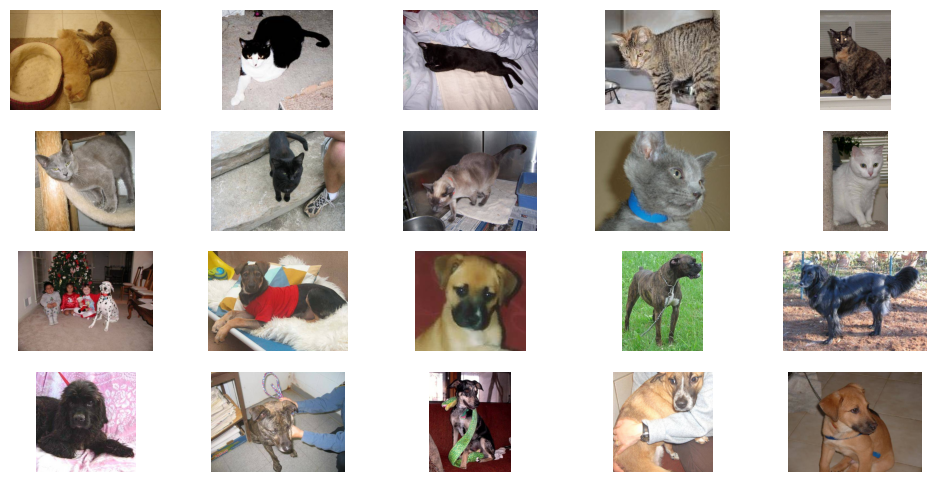

In [8]:
#visualizing few pictures

plt.subplots(4,5, figsize=(12,6))
for i in range(10):
    plt.subplot(4, 5, i+1)
    random_cat_file = random.choice(train_cat_files)
    random_cat_filepath = os.path.join(train_cat_dir, random_cat_file)
    img = mpimg.imread(random_cat_filepath)
    plt.imshow(img)
    plt.axis("off")

for i in range(10):
    plt.subplot(4, 5, i+11)
    random_dog_file = random.choice(train_dog_files)
    random_dog_filepath = os.path.join(train_dog_dir, random_dog_file)
    img = mpimg.imread(random_dog_filepath)
    plt.imshow(img)
    plt.axis("off")    


In [9]:
#Model building

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150,150,3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

Until now, rescalingwas done  as part of the data pipeline (i.e. with a .map method of the tf.data.Dataset). Here, we used a different approach where this process happens within the model itself. This is usually the preferred way so we don't need to remember rescaling your images. The model does it for us.

In [10]:
#model compiling

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=['accuracy'])



In [11]:
#data preprocessing

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    color_mode="rgb",
    image_size=(150,150),
    batch_size=200,
    label_mode="binary"
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    color_mode="rgb",
    image_size=(150,150),
    batch_size=200,
    label_mode="binary"
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
#few more optimization methods
shuffle_buffer_size=1000
prefetch_buffer_size = tf.data.AUTOTUNE

train_dataset_final = train_dataset.cache().shuffle(shuffle_buffer_size).prefetch(prefetch_buffer_size)
validation_dataset_final = validation_dataset.cache().shuffle(shuffle_buffer_size).prefetch(prefetch_buffer_size)

In [17]:
#model training

history = model.fit(
    train_dataset_final,
    epochs=20,
    validation_data = validation_dataset_final,
    verbose=2
)

Epoch 1/20
100/100 - 29s - 291ms/step - accuracy: 0.8723 - loss: 0.2949 - val_accuracy: 0.8276 - val_loss: 0.3788
Epoch 2/20
100/100 - 27s - 274ms/step - accuracy: 0.8902 - loss: 0.2577 - val_accuracy: 0.8346 - val_loss: 0.3738
Epoch 3/20
100/100 - 26s - 263ms/step - accuracy: 0.9164 - loss: 0.2175 - val_accuracy: 0.8204 - val_loss: 0.3966
Epoch 4/20
100/100 - 26s - 264ms/step - accuracy: 0.9320 - loss: 0.1805 - val_accuracy: 0.8140 - val_loss: 0.5154
Epoch 5/20
100/100 - 26s - 263ms/step - accuracy: 0.9469 - loss: 0.1496 - val_accuracy: 0.7946 - val_loss: 0.6158
Epoch 6/20
100/100 - 25s - 254ms/step - accuracy: 0.9608 - loss: 0.1232 - val_accuracy: 0.8152 - val_loss: 0.5902
Epoch 7/20
100/100 - 26s - 259ms/step - accuracy: 0.9671 - loss: 0.0961 - val_accuracy: 0.8116 - val_loss: 0.5640
Epoch 8/20
100/100 - 26s - 258ms/step - accuracy: 0.9780 - loss: 0.0785 - val_accuracy: 0.8328 - val_loss: 0.6338
Epoch 9/20
100/100 - 26s - 261ms/step - accuracy: 0.9676 - loss: 0.1278 - val_accuracy: 

Text(0.5, 1.0, 'Accuracy Plot')

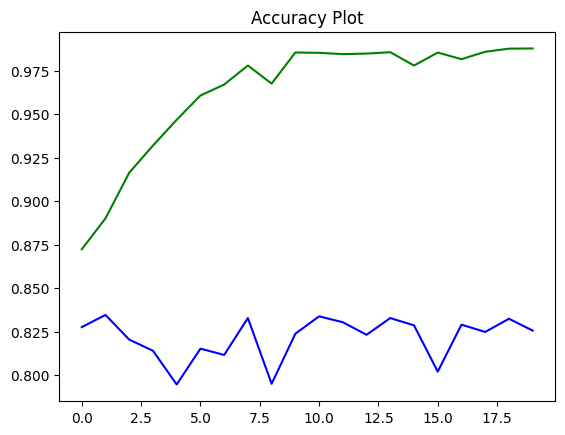

In [18]:
#Accuracy and loss plots

epochs = range(len(history.history['accuracy']))
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'g', label="training_accuracy")
plt.plot(epochs, val_accuracy, 'b', label="validation_accuracy")

plt.title("Accuracy Plot")

Text(0.5, 1.0, 'Loss Plot')

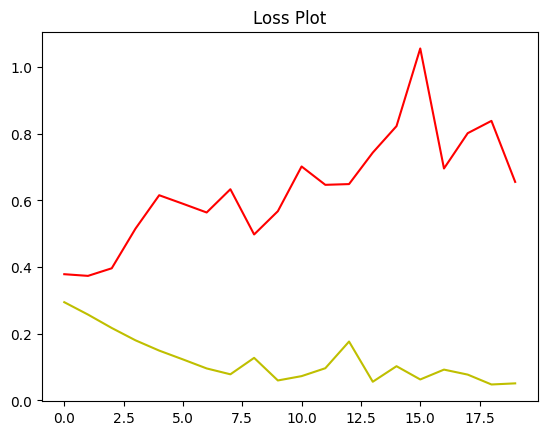

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'y-', label="training_loss")
plt.plot(epochs, val_loss, 'r-', label="validation_loss")
plt.title("Loss Plot")

#### Observation:

Looking at training and validation accuracy, it looks like model is over-fitting on data.

In [22]:
#Model prediction

uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    img = tf.keras.utils.load_img(file, target_size=(150,150))
    img = tf.keras.utils.img_to_array(img)
    img = img/255.
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img, verbose=False)[0][0]
   

    
    with out:
        if prediction >= 0.5:
            print(f"{filename} is a dog with {prediction}")
        else:
            print(f"{filename} is a cat with {prediction}")  

def on_upload_change(change):
    items = change.new

    for item in items:
        file_jpg = BytesIO(item.content)
        file_predict(item.name, file_jpg, out)

uploader.observe(on_upload_change, names="value")            

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()

Note:

If we notice below errors, we can use code blocks which fetch bad files(ones with different mode other than "rgb") and corrupt files , removed them.

1. Number of channels inherent in the image must be 1, 3 or 4, was 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_1498]


2. Input size should match (header_size + row_size * abs_height) but they differ by 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_1498]